<a href="https://colab.research.google.com/github/ajengfitria/Text-Analysis-with-Python/blob/main/UAS_Text_Analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Import Library**

* NLTK merupakan library yang digunakan untuk membantu kita dalam bekerja dengan teks

In [ ]:
# Import Library
import pandas as pd
import nltk

##**2. Import Data**

In [ ]:
# A. Import Dataset dari data lokal
from google.colab import files
uploaded = files.upload()

Saving Corona_NLP_test.csv to Corona_NLP_test (1).csv


In [ ]:
# B. Define Dataset
# menamakan dataset dengan variabel df
df = pd.read_csv('Corona_NLP_test.csv')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
## Optional, if Dataset UnicodeError Occured
# ada kemungkinan untuk error encoding (proses penempatan urutan karakter)
df = pd.read_csv("Corona_NLP_test.csv", encoding = "ISO-8859-1")

In [ ]:
# .head untuk menampilkan 5 baris teratas
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
# .shape menampilkan jumlah baris dan kolom
df.shape

(3798, 6)

#**3. PreProcessing**

* Preprocessing data bertujuan untuk merapihkan dataset

###a. Remove Duplicate

In [ ]:
# Menghilangkan duplikat pada dataset dengan kolom 'OriginalTweet'
df = df.drop_duplicates(subset=['OriginalTweet'])
df.shape

(3798, 6)

###b. RemoveURL

In [ ]:
# Menghilangkan URL pada dataset dengan kolom 'OriginalTweet'
df['OriginalTweet'] = df['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

###c. LowerCasing

In [ ]:
# Merubah keseluruhan kalimat di kolom 'OriginalTweet' menjadi huruf kecil
df['OriginalTweet'] = df['OriginalTweet'].str.lower()
df['OriginalTweet'].head(5)

0    trending: new yorkers encounter empty supermar...
1    when i couldn't find hand sanitizer at fred me...
2    find out how you can protect yourself and love...
3    #panic buying hits #newyork city as anxious sh...
4    #toiletpaper #dunnypaper #coronavirus #coronav...
Name: OriginalTweet, dtype: object

###d. RemoveUsername

In [ ]:
# Menghilangkan kata yang diawali oleh simbol @ pada kolom 'text'
df['OriginalTweet'] = df['OriginalTweet'].str.replace('@[^\s]+','', case=False)

###e. Tokenize

In [ ]:
# Import Library
# Tokenizing berfungsi untuk memisahkan teks menjadi potongan-potongan berupa token, 
# bisa berupa potongan huruf, kata, atau kalimat, sebelum dianalisis lebih lanjut
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Menguji fungsi Tokenize
example_text = df.iloc[1]
print(nltk.word_tokenize(example_text['OriginalTweet']))

['when', 'i', 'could', "n't", 'find', 'hand', 'sanitizer', 'at', 'fred', 'meyer', ',', 'i', 'turned', 'to', '#', 'amazon', '.', 'but', '$', '114.97', 'for', 'a', '2', 'pack', 'of', 'purell', '?', '?', '!', '!', 'check', 'out', 'how', '#', 'coronavirus', 'concerns', 'are', 'driving', 'up', 'prices', '.']


In [ ]:
# Menerapkan fungsi Tokenize pada Dataset
def identify_tokens(row):
    OriginalTweet = row['OriginalTweet']
    tokens = nltk.word_tokenize(OriginalTweet)
    # yang diambil hanya kata, bukan termasuk tanda baca
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['OriginalTweet'] = df.apply(identify_tokens, axis=1)
df['OriginalTweet'].head(5)

0    [trending, new, yorkers, encounter, empty, sup...
1    [when, i, could, find, hand, sanitizer, at, fr...
2    [find, out, how, you, can, protect, yourself, ...
3    [panic, buying, hits, newyork, city, as, anxio...
4    [toiletpaper, dunnypaper, coronavirus, coronav...
Name: OriginalTweet, dtype: object

###f. Stopwords

In [ ]:
# Import Library
# Berfungsi untuk menghilangkankata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna
# Contoh  “yang”, “dan”, “di”, “dari” ("is", "and", etc)
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Menerapkan stopwords bahasa Inggris
stops = set(nltk.corpus.stopwords.words('english'))

In [ ]:
# Menerapkan fungsi stopwords pada dataset kolom OriginalTweet
def remove_stops(row):
    OriginalTweet = row['OriginalTweet']
    meaningful_words = [w for w in OriginalTweet if not w in stops]
    return (meaningful_words)

df['OriginalTweet'] = df.apply(remove_stops, axis=1)

In [ ]:
# Joining OriginalTweet
df['OriginalTweet'] = df['OriginalTweet'].str.join(" ")

In [ ]:
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,trending new yorkers encounter empty supermark...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,could find hand sanitizer fred meyer turned am...,Positive
2,3,44955,NaN,02-03-2020,find protect loved ones coronavirus,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,panic buying hits newyork city anxious shopper...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,toiletpaper dunnypaper coronavirus coronavirus...,Neutral
5,6,44958,Los Angeles,03-03-2020,remember last time paid gallon regular gas los...,Neutral
6,7,44959,NaN,03-03-2020,voting age coronavirus hand sanitizer supertue...,Positive
7,8,44960,"Geneva, Switzerland",03-03-2020,stop without protecting healthworkers prices s...,Neutral
8,9,44961,NaN,04-03-2020,hi twitter pharmacist sell hand sanitizer livi...,Extremely Negative
9,10,44962,"Dublin, Ireland",04-03-2020,anyone supermarket last days went normal shop ...,Extremely Positive


###g. Special Character

In [ ]:
# Menghilangkan simbol-simbol pada dataset
import string

printable = set(string.printable)

def remove_spec_chars(in_str):
    return ''.join([c for c in in_str if c in printable])

df['OriginalTweet'].apply(remove_spec_chars)
df['OriginalTweet'].head(10)

0    trending new yorkers encounter empty supermark...
1    could find hand sanitizer fred meyer turned am...
2                  find protect loved ones coronavirus
3    panic buying hits newyork city anxious shopper...
4    toiletpaper dunnypaper coronavirus coronavirus...
5    remember last time paid gallon regular gas los...
6    voting age coronavirus hand sanitizer supertue...
7    stop without protecting healthworkers prices s...
8    hi twitter pharmacist sell hand sanitizer livi...
9    anyone supermarket last days went normal shop ...
Name: OriginalTweet, dtype: object

#**4. Bag of Words**

* Digunakan untuk menghitung seberapa sering muncul token tertentu

In [ ]:
# Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer()

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(df['OriginalTweet'])

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
bag = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
bag

,aadya,aadyasitara,aamiin,aapl,abajam,abandon,abandoning,abeg,abid,abiding,abiity,ability,able,abominations,aboutâ,abroad,absolute,absolutely,absurd,absurdity,abt,abta,abundance,abuse,abyss,ac,acc,accelerate,accelerated,accept,acceptable,acceptance,access,accidentally,accidently,accommodation,accompanying,accomplished,accord,according,...,yorkers,yoself,young,younger,youre,yourenotdying,youself,youth,youthministry,youtube,youtubechannel,youtuber,youtubesubscribers,youâ,yoy,yqr,yr,yrs,yummy,yyc,yzf,zachary,zc,zce,zealand,zehrs,zeke,zen,zero,zimbabweans,zinc,zionist,zirnelle,zombie,zombieapocalypse,zombieland,zombies,zoo,zoom,zsl
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3794,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Save Bag of Word to CSV
bag.to_csv('BOW.csv', index=False)

#**5. TF-IDF**

* Menggambarkan seberapa pentingnya kata (term) dalam sebuah 
dokumen dan korpus. Proses ini digunakan untuk menilai bobot relevansi term dari sebuah dokumen terhadap seluruh dokumen dalam korpus

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer()
values = tfidf_vectorizer.fit_transform(df['OriginalTweet'])

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
tfidf= pd.DataFrame(values.toarray(), columns = feature_names)

In [ ]:
# Save TFIDF to CSV
tfidf.to_csv('TFIDF.csv', index=False)

In [ ]:
# Mengurutkan TFIDF berdasarkan kolom 'aamiin'
tfidf.sort_values(by=['aamiin'], axis=0, ascending=False, inplace=True)
tfidf

,aadya,aadyasitara,aamiin,aapl,abajam,abandon,abandoning,abeg,abid,abiding,abiity,ability,able,abominations,aboutâ,abroad,absolute,absolutely,absurd,absurdity,abt,abta,abundance,abuse,abyss,ac,acc,accelerate,accelerated,accept,acceptable,acceptance,access,accidentally,accidently,accommodation,accompanying,accomplished,accord,according,...,yorkers,yoself,young,younger,youre,yourenotdying,youself,youth,youthministry,youtube,youtubechannel,youtuber,youtubesubscribers,youâ,yoy,yqr,yr,yrs,yummy,yyc,yzf,zachary,zc,zce,zealand,zehrs,zeke,zen,zero,zimbabweans,zinc,zionist,zirnelle,zombie,zombieapocalypse,zombieland,zombies,zoo,zoom,zsl
3719,0.0,0.0,0.280042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
582,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.387783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3771,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3772,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3773,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

#**6. Visualization**

In [ ]:
# Import Library
from wordcloud import WordCloud
import matplotlib.pyplot as plt

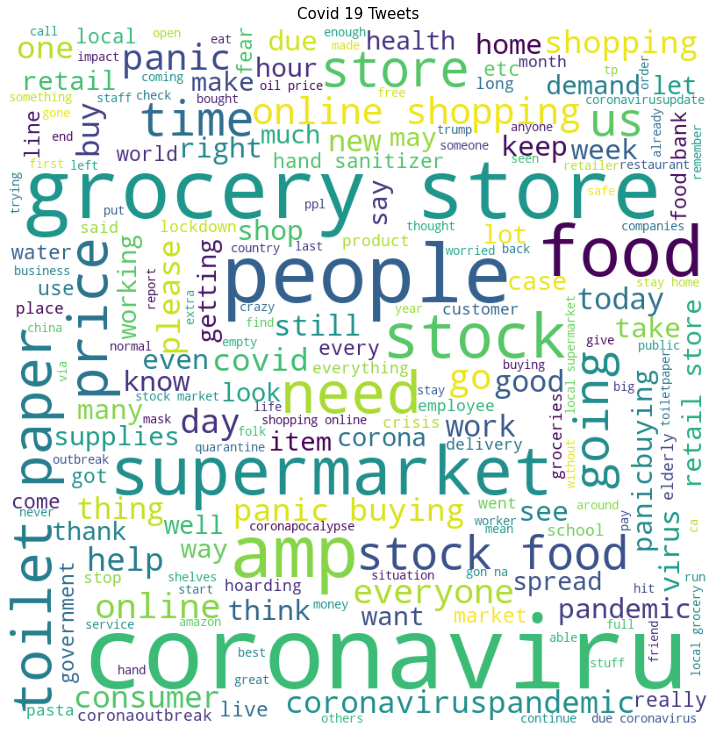

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(df['OriginalTweet']))
# Generate plot
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.title('Covid 19 Tweets',fontsize = 15)
plt.tight_layout(pad = 0) 
  
plt.show()

#**7. Save to CSV**

In [ ]:
# Menyimpan dataset yang telah dipreprocess ke CSV
df.to_csv('UAS_Text Analys.csv', index=False)